In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
df = pd.read_csv("Sample_data//placement.csv")

In [8]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


Text(0, 0.5, 'Package (in lpa)')

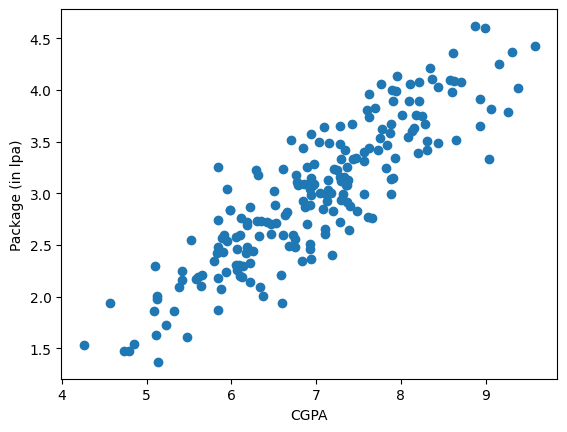

In [10]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')

In [11]:
# Saperating dependent and independent variables
X = df.iloc[:, :1]
y = df.iloc[:, -1]

In [13]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [ ]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [16]:
type(y), type(X)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [19]:
type(pd.Series(X['cgpa']))

pandas.core.series.Series

In [ ]:
'''
Random_State
Any integer can be used, such as random_state=42, random_state=0, or random_state=1. 
The number itself doesn’t matter, but using a fixed value ensures consistency.
Means when ever we run the code, we get the same result. for this random state.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [21]:
lr = LinearRegression()

In [26]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Text(0, 0.5, 'Package (in lpa)')

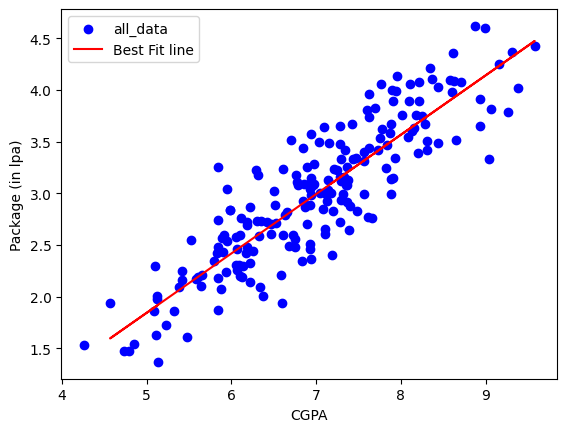

In [33]:
plt.scatter(df['cgpa'], df['package'], color='blue', label='all_data')
plt.plot(X_train, lr.predict(X_train), color='red', label='Best Fit line')
plt.legend()
plt.xlabel("CGPA")
plt.ylabel("Package (in lpa)")

## Calculate Metrices of Model

### Mean Absolute Error

In [ ]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
# This will be in terms of "lpa"

MAE: 0.23150985393278373


### Mean Square Error

In [ ]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
# having unit lap^2

MSE: 0.08417638361329656


### R2Square

In [36]:
print(f"R2: {r2_score(y_test, y_pred)}")
R2 = r2_score(y_test, y_pred)
# having not ant unit, it is in absloute term

R2: 0.7730984312051673


- R2_score = 0.77 means that 77% of the variance in the target variable (package) is explained by the model or explained by the CGPA.

### Adjusted R2Square

In [37]:
X_test.shape

(40, 1)

In [38]:
print(f"R2_adj: {1 - ((1-R2) * (40-1) / (40-1-1))}")
# having not ant unit, it is in absloute term

R2_adj: 0.7671273372895138


## Let's Add a column to evalute the R2_Score and adj_R2_score

In [39]:
new_df = df.copy()
new_df['random_feature'] = np.random.random(200)

new_df = new_df[['cgpa','random_feature','package']]
new_df.head()

,cgpa,random_feature,package
0,6.89,0.161190,3.26
1,5.12,0.345150,1.98
2,7.82,0.977406,3.25
3,7.42,0.865262,3.67
4,6.94,0.711892,3.57


Text(0, 0.5, 'Package(in lpa)')

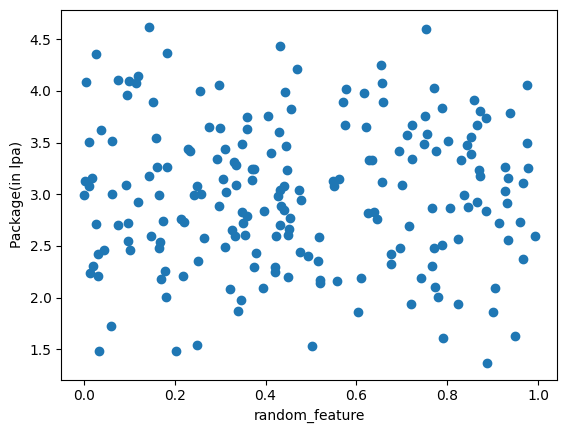

In [41]:
#Ploting Newly added column with dependent variable
plt.scatter(new_df['random_feature'],new_df['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

- We can see that there is not any relationship b/w these two variables.

In [42]:
X = new_df.iloc[:, :2]
y = new_df.iloc[:, -1]

In [44]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [49]:
print(f"R2_Score: {r2_score(y_test, y_pred)}")
R2 = r2_score(y_test, y_pred)

R2_Score: 0.7601025865026033


- R2 score 0.76 means that 76% of the variance of the dependent variable (package) is explain by the model or independent variables (CGPA and random_feature)

- before adding the new variable R2_Score = R2: 0.7730984312051673
- here R2Score decreased by **0.013**

In [51]:
X_test.shape

(40, 2)

In [52]:
print(f"R2_adj: {1 - ((1-R2) * (40-1) / (40-1-2))}")
# having not ant unit, it is in absloute term

R2_adj: 0.7471351587459873


- Adj R2 Score before adding new feature is **R2_adj: 0.7671273372895138**
- Adj R2 Score decreased by **0.02**
- Since the newly added feature has no any correlation with dependent variable, so here r2score decreases but Adj R2 Score deceases more 